Ham-Spam Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/preprocessed_dataset.csv')
data.head()

,labels,preprocessed_docs
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [3]:
data.tail()

,labels,preprocessed_docs
5561,1,nd time tri contact u u pound prize claim easi...
5562,0,b go esplanad fr home
5563,0,piti mood soani suggest
5564,0,guy bitch act like would interest buy someth e...
5565,0,rofl true name


In [4]:
print(f'Null Data: \n{data.isnull().sum()}\n')
print('Empty Cell: \n{}'.format(data[data['preprocessed_docs'] == ''].index))

Null Data: 
labels               0
preprocessed_docs    0
dtype: int64

Empty Cell: 
Int64Index([], dtype='int64')


In [5]:
print(len(data))

5566


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

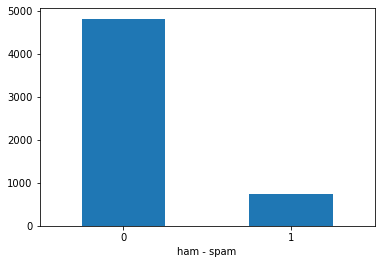

In [6]:
data['labels'].value_counts().plot(kind='bar')
plt.xlabel('ham - spam')
plt.xticks(rotation=0)

In [7]:
train, validation = train_test_split(data, test_size = 0.3,random_state = 14, stratify = data['labels'])

In [8]:
# test text prep !!!
vectorizer = CountVectorizer()
vectorizer.fit_transform(train['preprocessed_docs'])
print('Num of Vocabs: {}'.format(len(vectorizer.vocabulary_)))

Num of Vocabs: 5793


In [9]:
train_features = vectorizer.transform(train['preprocessed_docs'].values)
validation_features = vectorizer.transform(validation['preprocessed_docs'].values)

Logistic Regression

In [10]:
model = LogisticRegression(solver = 'liblinear', random_state = 14, max_iter = 1000)
model.fit(train_features, train['labels'])
y_pred = model.predict(validation_features)

In [11]:
print("Accuracy: ",round(accuracy_score(validation['labels'].values,y_pred),3))
print("F1: ",round(f1_score(validation['labels'].values, y_pred),3))

Accuracy:  0.98
F1:  0.923


In [12]:
report = classification_report(validation['labels'].values, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1446
           1       0.96      0.89      0.92       224

    accuracy                           0.98      1670
   macro avg       0.97      0.94      0.96      1670
weighted avg       0.98      0.98      0.98      1670



Text(0.5, 16.5, 'Predicted label')

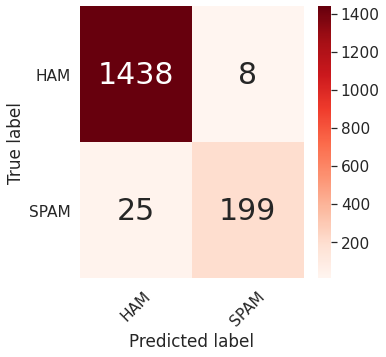

In [13]:
cnf_matrix = confusion_matrix(validation['labels'].values, y_pred)
plt.figure(figsize=(5,5))

x_axis_labels = ['HAM', 'SPAM']
y_axis_labels = ['HAM', 'SPAM']

sns.set(font_scale=1.4)
sns.heatmap(cnf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, annot_kws={"size": 30} , cmap="Reds", fmt='g')

plt.yticks(rotation=360)
plt.xticks(rotation=45)

plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig(r'graphs\cnf.png', dpi = 100)

Support-Vector Machine

In [14]:
model = svm.SVC(kernel='linear', random_state = 14)
model.fit(train_features, train['labels'])
y_pred = model.predict(validation_features)

In [15]:
print("Accuracy: ",round(accuracy_score(validation['labels'].values,y_pred),3))
print("F1: ",round(f1_score(validation['labels'].values, y_pred),3))

Accuracy:  0.981
F1:  0.929


In [16]:
report = classification_report(validation['labels'].values, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1446
           1       0.95      0.91      0.93       224

    accuracy                           0.98      1670
   macro avg       0.97      0.95      0.96      1670
weighted avg       0.98      0.98      0.98      1670



Text(0.5, 16.5, 'Predicted label')

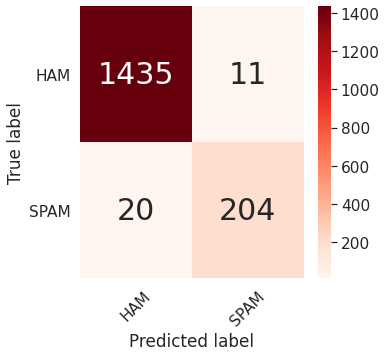

In [17]:
cnf_matrix = confusion_matrix(validation['labels'].values, y_pred)
plt.figure(figsize=(5,5))

x_axis_labels = ['HAM', 'SPAM']
y_axis_labels = ['HAM', 'SPAM']

sns.set(font_scale=1.4)
sns.heatmap(cnf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, annot_kws={"size": 30} , cmap="Reds", fmt='g')

plt.yticks(rotation=360)
plt.xticks(rotation=45)

plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.savefig(r'graphs\cnf.png', dpi = 100)